#Getting Started with Logistic Regression for Binary Classification

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_curve,
                            roc_auc_score, precision_score,
                            recall_score, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


##Step 1: The Problem - Can We Predict Loan Approvals?

In [2]:
# Load the dataset

!curl -L -o ./loan-approval-classification-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/taweilo/loan-approval-classification-data
!unzip ./loan-approval-classification-data.zip
loan_data = pd.read_csv('loan_data.csv')

# Display information about the dataset
print("Dataset Information:")
print(f"Shape: {loan_data.shape}")
print("\nFirst few rows:")
print(loan_data.head())

print("\nSummary statistics:")
print(loan_data.describe())

print("\nCheck for missing values:")
print(loan_data.isnull().sum())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  750k  100  750k    0     0  1059k      0 --:--:-- --:--:-- --:--:-- 1059k
Archive:  ./loan-approval-classification-data.zip
  inflating: loan_data.csv           
Dataset Information:
Shape: (45000, 14)

First few rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \

##Step 2: Understanding the Data

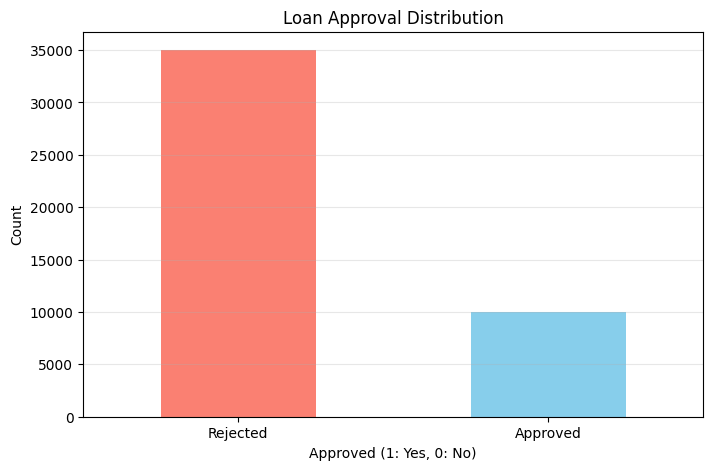

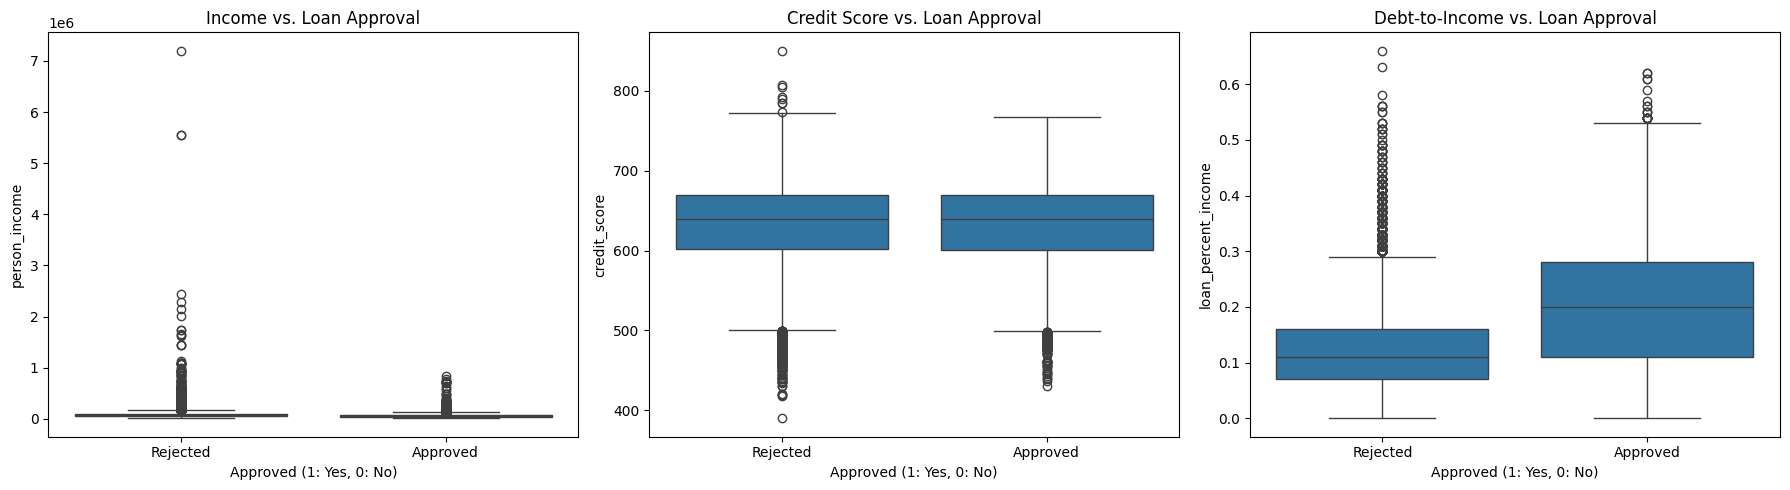

In [3]:
# Explore the target variable distribution
plt.figure(figsize=(8, 5))
loan_data['loan_status'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Loan Approval Distribution')
plt.xlabel('Approved (1: Yes, 0: No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Approved'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

#added during screencast
# Explore relationships between features and target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income vs Approval
sns.boxplot(x='loan_status', y='person_income', data=loan_data, ax=axes[0])
axes[0].set_title('Income vs. Loan Approval')
axes[0].set_xlabel('Approved (1: Yes, 0: No)')
axes[0].set_xticklabels(['Rejected', 'Approved'])

# Credit Score vs Approval
sns.boxplot(x='loan_status', y='credit_score', data=loan_data, ax=axes[1])
axes[1].set_title('Credit Score vs. Loan Approval')
axes[1].set_xlabel('Approved (1: Yes, 0: No)')
axes[1].set_xticklabels(['Rejected', 'Approved'])

# DTI vs Approval
sns.boxplot(x='loan_status', y='loan_percent_income', data=loan_data, ax=axes[2])
axes[2].set_title('Debt-to-Income vs. Loan Approval')
axes[2].set_xlabel('Approved (1: Yes, 0: No)')
axes[2].set_xticklabels(['Rejected', 'Approved'])

plt.tight_layout()
plt.show()

##Step 3: Applying Logistic Regression

In [4]:
# Prepare features and target
X = loan_data[['person_income', 'credit_score', 'loan_percent_income']]
y = loan_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Print the model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Explain why logistic regression is better than linear regression for binary classification
print("\nWhy Logistic Regression for Binary Classification?")
print("- Linear regression outputs unbounded values, not probabilities")
print("- Logistic regression uses the sigmoid function to output values between 0 and 1")
print("- These values represent probabilities, making them ideal for binary classification")

Model Coefficients:
person_income: -0.8230
credit_score: -0.0034
loan_percent_income: 0.8158
Intercept: -1.5299

Why Logistic Regression for Binary Classification?
- Linear regression outputs unbounded values, not probabilities
- Logistic regression uses the sigmoid function to output values between 0 and 1
- These values represent probabilities, making them ideal for binary classification


In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Display example predictions
print("\nSample Predictions (First 5):")
example_df = pd.DataFrame({
    'Income': X_test['person_income'].values[:5],
    'Credit Score': X_test['credit_score'].values[:5],
    'Debt-to-Income': X_test['loan_percent_income'].values[:5],
    'True Label': y_test.values[:5],
    'Predicted': y_pred[:5],
    'Probability': np.round(y_pred_proba[:5], 3)
})
print(example_df)

# Make a prediction on a new loan application
#added during screencast
new_applicant = np.array([[75000, 720, 0.25]])  # income, credit_score, debt_to_income
new_applicant_scaled = scaler.transform(new_applicant)
new_prediction = model.predict(new_applicant_scaled)[0]
new_probability = model.predict_proba(new_applicant_scaled)[0, 1]

print("\nNew Loan Application:")
print(f"Income: $75,000, Credit Score: 720, Debt-to-Income: 0.25")
print(f"Prediction: {'Approved' if new_prediction == 1 else 'Rejected'}")
print(f"Approval Probability: {new_probability:.2f} or {new_probability*100:.1f}%")


Sample Predictions (First 5):
    Income  Credit Score  Debt-to-Income  True Label  Predicted  Probability
0  96865.0           601            0.08           0          0        0.096
1  56838.0           647            0.16           0          0        0.248
2  37298.0           711            0.13           1          0        0.230
3  39944.0           597            0.13           0          0        0.227
4  67974.0           586            0.15           1          0        0.213

New Loan Application:
Income: $75,000, Credit Score: 720, Debt-to-Income: 0.25
Prediction: Rejected
Approval Probability: 0.39 or 39.0%


#Evaluating Binary Classification Models with Logistic Regression

##Step 1: Predicting Outcomes

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8177 (81.77%)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6990
           1       0.73      0.29      0.41      2010

    accuracy                           0.82      9000
   macro avg       0.78      0.63      0.65      9000
weighted avg       0.81      0.82      0.79      9000



##Step 2: Evaluating Model Performance

<Figure size 800x600 with 0 Axes>

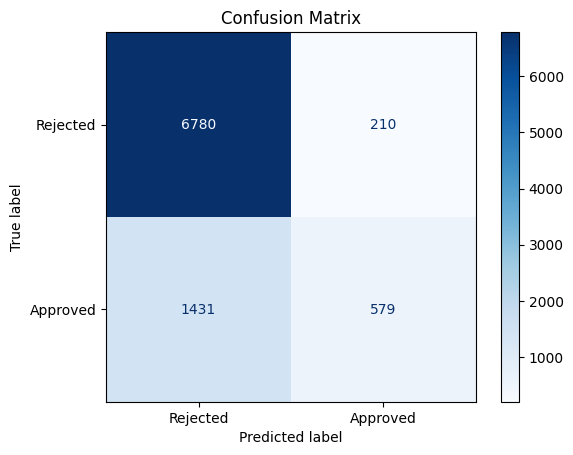


Confusion Matrix Components:
True Positives (TP): 579 - Correctly predicted as approved
True Negatives (TN): 6780 - Correctly predicted as rejected
False Positives (FP): 210 - Incorrectly predicted as approved (Type I error)
False Negatives (FN): 1431 - Incorrectly predicted as rejected (Type II error)


In [7]:
# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Rejected', 'Approved']
)

plt.figure(figsize=(8, 6))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Explain the confusion matrix components
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Components:")
print(f"True Positives (TP): {tp} - Correctly predicted as approved")
print(f"True Negatives (TN): {tn} - Correctly predicted as rejected")
print(f"False Positives (FP): {fp} - Incorrectly predicted as approved (Type I error)")
print(f"False Negatives (FN): {fn} - Incorrectly predicted as rejected (Type II error)")

##Step 3: Go Beyond Accuracy


Detailed Metrics:
Precision: 0.7338 - Proportion of correct approvals among predicted approvals
Recall: 0.2881 - Proportion of actual approvals correctly identified
F1 Score: 0.4137 - Harmonic mean of precision and recall


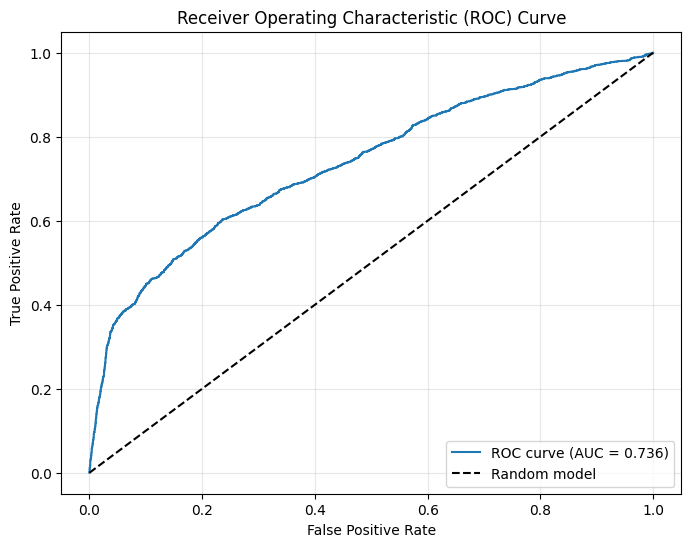

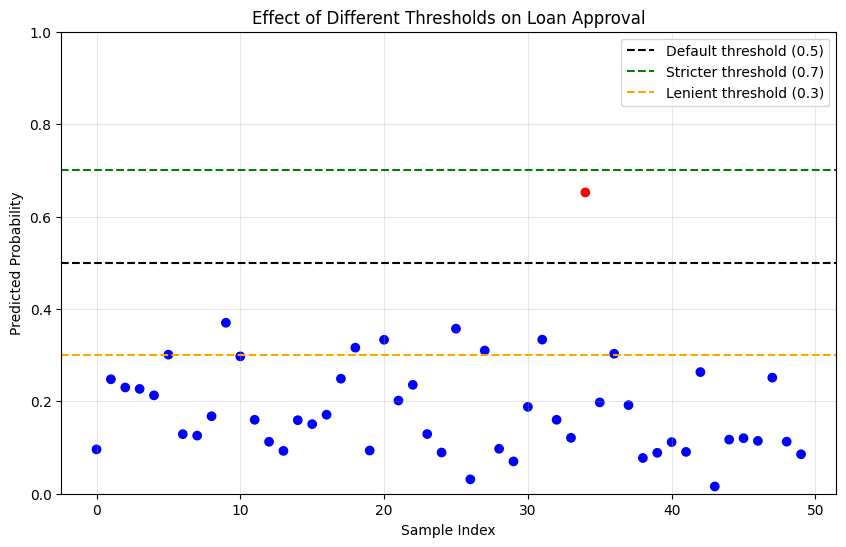


Business Implications:
- A stricter threshold (e.g., 0.7) reduces false positives but increases false negatives
  → Fewer bad loans but might reject good customers
- A more lenient threshold (e.g., 0.3) increases false positives but reduces false negatives
  → Approves more loans to good customers but also to risky applicants


In [8]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nDetailed Metrics:")
print(f"Precision: {precision:.4f} - Proportion of correct approvals among predicted approvals")
print(f"Recall: {recall:.4f} - Proportion of actual approvals correctly identified")
print(f"F1 Score: {f1:.4f} - Harmonic mean of precision and recall")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Show threshold effect on predictions
plt.figure(figsize=(10, 6))

# Create a sample of probabilities
proba_subset = y_pred_proba[:50]
indices = range(len(proba_subset))

# Plot the probabilities
plt.scatter(indices, proba_subset, c=['red' if p > 0.5 else 'blue' for p in proba_subset])
plt.axhline(y=0.5, color='k', linestyle='--', label='Default threshold (0.5)')
plt.axhline(y=0.7, color='g', linestyle='--', label='Stricter threshold (0.7)')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Lenient threshold (0.3)')

plt.ylim(0, 1)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Effect of Different Thresholds on Loan Approval')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nBusiness Implications:")
print("- A stricter threshold (e.g., 0.7) reduces false positives but increases false negatives")
print("  → Fewer bad loans but might reject good customers")
print("- A more lenient threshold (e.g., 0.3) increases false positives but reduces false negatives")
print("  → Approves more loans to good customers but also to risky applicants")